c:\Users\User\Desktop\Week3\Insurance-Risk-Analytics-Predictive-Modelling\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025/06/16 16:50:34 INFO mlflow.tracking.fluent: Experiment with name 'Optimum Price' does not exist. Creating a new experiment.


Training LinearRegression...


2025/06/16 16:50:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/16 16:50:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training RandomForestRegressor...


2025/06/16 16:57:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/16 16:57:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training GradientBoostingRegressor...


2025/06/16 16:59:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/16 16:59:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training DecisionTreeRegressor...


2025/06/16 16:59:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/16 16:59:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best model: LinearRegression
Best R2 Score: 5.0563033888728626e-05
Best MSE: 4587471.716544365


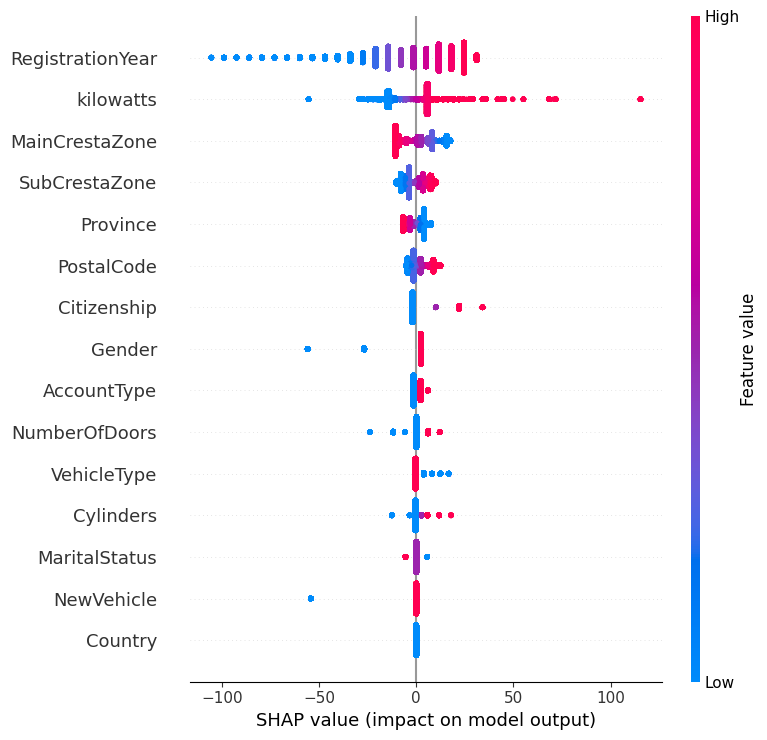

In [14]:
import os
import sys

# Add scripts path (adjust as needed)




import sys
import os

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Adjust if notebook location differs
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Then you can import like this:
from src.data_loading import load_data, clean_data
from src.encoding import encode_features
from src.train_models import get_models, train_and_evaluate
from src.training import train_and_log_model, initialize_mlflow, explain_model_with_shap


# Import modules
#from data_loading import load_data, clean_data
#from encoding import encode_features
#from train_models import get_models, train_and_evaluate
#from training import train_and_log_model, initialize_mlflow, explain_model_with_shap

# Load and clean data
PATH_TO_DATA = "../data/MachineLearningRating_v3.txt"
data = load_data(PATH_TO_DATA)
data = clean_data(data)

# Define features
car_features = ['Cylinders', 'NewVehicle', 'RegistrationYear', 'VehicleType', 'NumberOfDoors', 'kilowatts']
location_features = ['Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone']
user_features = ['Gender', 'MaritalStatus', 'AccountType', 'Citizenship']
target_col = ['OptimalPremium']
predict_cols = car_features + location_features + user_features

# Identify categorical features
all_features = predict_cols + target_col
data_types = data[all_features].dtypes
categorical = [col for col in all_features if data_types[col] == 'object']

# Encode categorical features
encoded_df = encode_features(data[all_features], categorical)

# Split features and target
X = encoded_df[predict_cols]
y = encoded_df[target_col]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

# Initialize MLflow
tracking_uri = "notebook"
experiment_name = "Optimum Price"
tracking_id = initialize_mlflow(uri=tracking_uri, experiment_name=experiment_name)

# Get models and train
models = get_models()
best_model, best_r2, best_mse = train_and_evaluate(models, x_train, y_train, x_test, y_test, train_and_log_model, tracking_id)

# Explain best model with SHAP
shap_values = explain_model_with_shap(best_model, x_train, x_test)


📊 SHAP Summary Plot – Visual Interpretation
This SHAP (SHapley Additive exPlanations) summary plot helps explain how each feature in the model influences the prediction of Optimal Premium.

Axes Interpretation
Y-Axis (Features): Lists all the features used in the model, including:

RegistrationYear, kilowatts, MainCrestaZone, SubCrestaZone, Province, AccountType, PostalCode, Citizenship, Gender, NumberOfDoors, VehicleType, MaritalStatus, NewVehicle, Cylinders, and Country.

X-Axis (SHAP Values): Indicates the impact of each feature on the model’s output (Optimal Premium).

Values range from approximately -100 to 100.

Positive SHAP values (right side) increase the prediction.

Negative SHAP values (left side) decrease the prediction.

Color Gradient
Red (High Feature Value) and Blue (Low Feature Value): The color represents the magnitude of the feature value.

Example: A high RegistrationYear (recent car) in red might increase the predicted premium.

A low kilowatts value (weaker engine) in blue might lower the predicted premium.

Result Insights
High-impact features: RegistrationYear and kilowatts show strong effects on predictions, with wide SHAP value distributions in both directions.

Geographic indicators: MainCrestaZone, SubCrestaZone, and Province contribute notably, highlighting location-based pricing influences.

Moderate impact features: PostalCode, Citizenship, and AccountType affect the model but less significantly.

Lower-impact features: Gender, NumberOfDoors, VehicleType, and NewVehicle show minimal influence on the premium predictions.

📌 Conclusion: Vehicle characteristics like registration year and engine power, along with geographic segmentation, are the most important drivers of premium pricing. These insights can inform dynamic pricing strategies and regional adjustments.